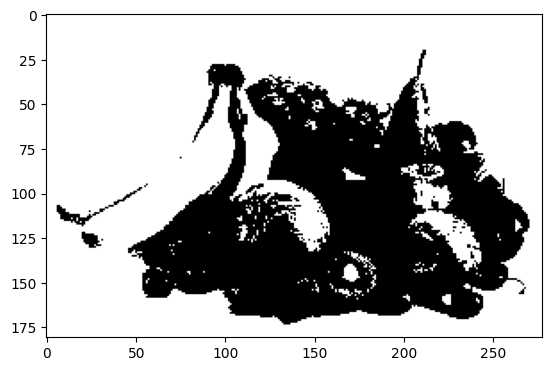

In [4]:
#2.1.1 Phương pháp Otsu
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters.thresholding import threshold_otsu
data = Image.open('fruit.jpg').convert('L')
a = np.asarray(data)
# performing Otsu's thresholding
thres = threshold_otsu(a)
# pixels with intensity greater than theshold are kept
b = a > thres
b = Image.fromarray (b)
plt.imshow(b)
plt.show()

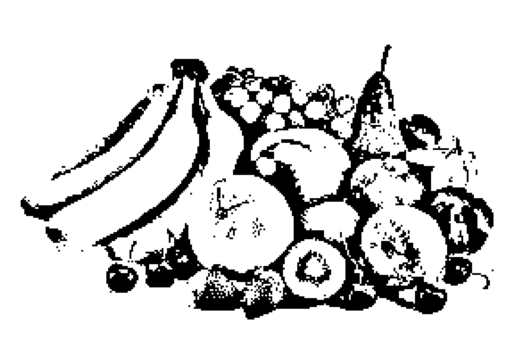

In [6]:
# 2.1.2 Phương pháp Adaptive Thresholding
from PIL import Image
import numpy as np
import matplotlib.pylab as plt
from skimage.filters import threshold_local

# Mở ảnh
data = Image.open('fruit.jpg').convert('L')
a = np.asarray(data)

# Tính ngưỡng cục bộ (block size = 39, offset = 10)
local_thresh = threshold_local(a, block_size=39, offset=10)

# Tạo ảnh nhị phân
b = a > local_thresh

# Chuyển về ảnh uint8 để hiển thị
b_img = Image.fromarray(b.astype(np.uint8)*255)

plt.imshow(b_img, cmap='gray')
plt.axis('off')
plt.show()


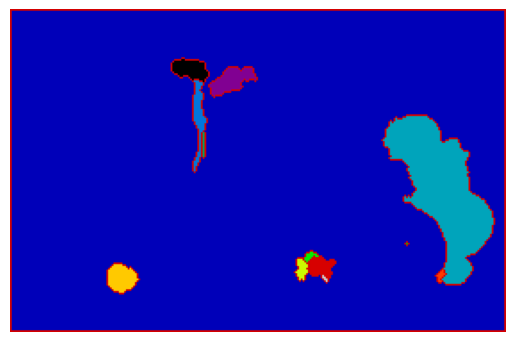

In [8]:
# 2.2 Phân vùng theo region
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

# opening the image and converting it to grayscale
data = cv2.imread('fruit.jpg')

# converting image from color to grayscale
a = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)

# thresholding the image to obtain cell pixels
thresh, bl = cv2.threshold(a, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# since Otsu's method has over segmented the image
# erosion operation is performed
b2 = cv2.erode(bl, None, iterations=2)

# distance transform is performed
dist_trans = cv2.distanceTransform(b2, 2, 3)

# thresholding the distance transform image to obtain pixels that are foreground
thresh, dt = cv2.threshold(dist_trans, 1, 255, cv2.THRESH_BINARY)

# performing labeling
labelled, ncc = label(dt)

# labelled is converted to 32-bit integer
labelled = labelled.astype(np.int32)

# performing watershed
cv2.watershed(data, labelled)

# Convert labelled array to an image (scale for visualization)
# Multiply by a factor to show colors
labelled_vis = (labelled * (255 / labelled.max())).astype(np.uint8)

b = Image.fromarray(labelled_vis)

plt.imshow(b, cmap='nipy_spectral')
plt.axis('off')
plt.show()


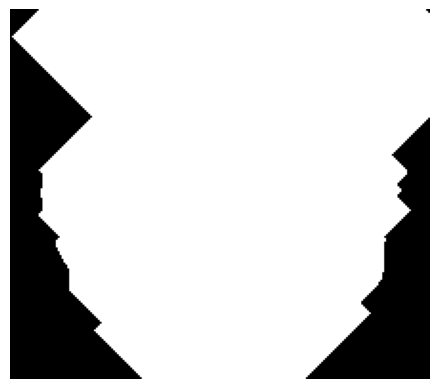

In [11]:
# 2.3.1 Sử dụng binary_dilation

import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt

# opening the image and converting it to grayscale
data = Image.open('dil img.gif').convert('L')

# convert to numpy array
arr = np.asarray(data)

# threshold to create binary image
thresh = 128
binary_img = arr > thresh

# apply binary dilation
b = nd.binary_dilation(binary_img, iterations=50)

# convert boolean array to uint8 image
b_uint8 = b.astype(np.uint8) * 255

# convert to Image for display
c = Image.fromarray(b_uint8)

c.show()

plt.imshow(c, cmap='gray')
plt.axis('off')
plt.show()


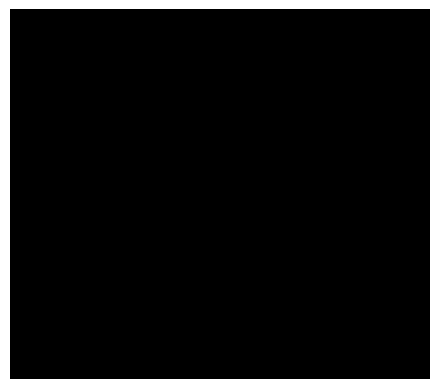

In [13]:
# 2.3.2 Sử dụng binary_opening
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt

# opening the image and converting it to grayscale
data = Image.open('dil img.gif').convert('L')
arr = np.asarray(data)

# threshold để tạo ảnh nhị phân
binary_img = arr > 128

# defining the structuring element
s = [[0, 1, 0], 
     [1, 1, 1], 
     [0, 1, 0]]

# apply binary opening
b = nd.binary_opening(binary_img, structure=s, iterations=25)

# convert boolean array to uint8 for display
b_uint8 = b.astype(np.uint8) * 255
c = Image.fromarray(b_uint8)

# hiển thị kết quả
c.show()
plt.imshow(c, cmap='gray')
plt.axis('off')
plt.show()


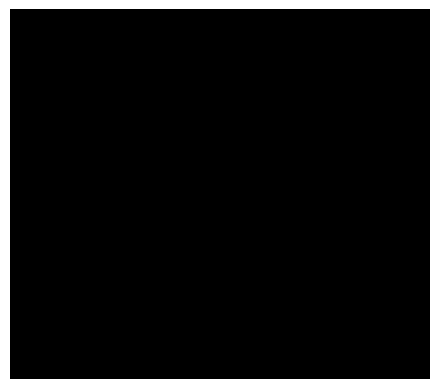

In [15]:
# 2.3.3 Sử dụng binary_erosion
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt

# opening the image and converting it to grayscale
data = Image.open('dil img.gif').convert('L')
arr = np.asarray(data)

# threshold để tạo ảnh nhị phân
binary_img = arr > 128

# defining the structuring element
s = np.array([[0, 1, 0],
              [1, 1, 1],
              [0, 1, 0]])

# apply binary erosion
b = nd.binary_erosion(binary_img, structure=s, iterations=50)

# convert boolean array to uint8 for display
b_uint8 = b.astype(np.uint8) * 255
c = Image.fromarray(b_uint8)

# hiển thị kết quả
c.show()
plt.imshow(c, cmap='gray')
plt.axis('off')
plt.show()


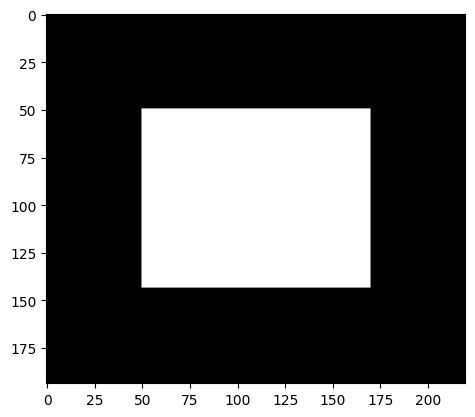

In [18]:
#2.3.4 Sử dụng binary_closing
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as np
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local
# opening the image and converting it to grayscale
data = Image.open('dil img.gif').convert('L')
# defining the structuring element
s = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
b = nd.binary_closing (data, structure=s, iterations=50)
c= Image.fromarray (b)
c.show ()
plt.imshow(c)
plt.show ()

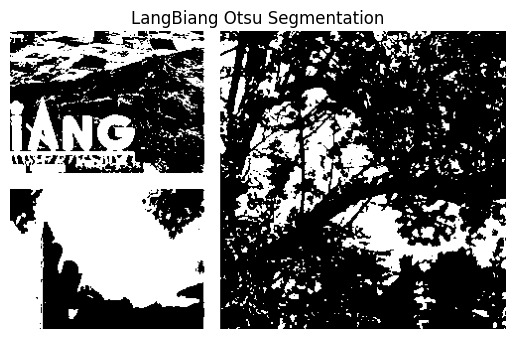

In [23]:
import cv2
import numpy as np
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt

# Đọc ảnh từ thư mục exercise
img = cv2.imread('exercise/dalat.jpg')

# Chuyển sang ảnh grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Giả sử vùng LangBiang nằm từ (y1:y2, x1:x2)
# Bạn thay bằng tọa độ thật nếu biết
y1, y2 = 200, 500
x1, x2 = 300, 800

# Cắt vùng LangBiang
crop = gray[y1:y2, x1:x2]

# Tịnh tiến sang phải 100 px
new_x1 = x1 + 100
new_x2 = x2 + 100

# Copy ảnh gốc để chỉnh sửa
img_translated = gray.copy()

# Dán vùng crop vào vị trí mới
img_translated[y1:y2, new_x1:new_x2] = crop

# Phân vùng LangBiang bằng Otsu
thresh_val = threshold_otsu(crop)

# Nếu muốn áp threshold cố định 0.3 thay vì Otsu thì dùng:
# thresh_val = 0.3 * 255

# Tạo ảnh nhị phân
binary_crop = (crop > thresh_val).astype(np.uint8) * 255

# Ghi ảnh nhị phân kết quả
cv2.imwrite('lang_biang.jpg', binary_crop)

# Hiển thị kết quả
plt.imshow(binary_crop, cmap='gray')
plt.title('LangBiang Otsu Segmentation')
plt.axis('off')
plt.show()


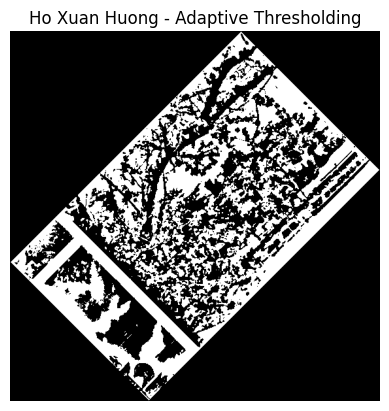

In [25]:
import cv2
import numpy as np
from skimage.filters import threshold_local
import matplotlib.pyplot as plt
import os
from scipy.ndimage import rotate

# Đường dẫn ảnh
path = 'exercise/dalat.jpg'

# Kiểm tra file có tồn tại không
if not os.path.exists(path):
    print("Không tìm thấy ảnh! Kiểm tra lại tên file hoặc đường dẫn.")
else:
    # Đọc ảnh màu
    img = cv2.imread(path)

    # Chuyển sang ảnh xám
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Ví dụ vùng Hồ Xuân Hương (thay bằng tọa độ thật nếu có)
    y1, y2 = 300, 600
    x1, x2 = 400, 900

    # Cắt vùng Hồ Xuân Hương
    crop = gray[y1:y2, x1:x2]

    # Xoay vùng crop 45 độ
    crop_rotated = rotate(crop, angle=45, reshape=True, order=1)

    # Áp dụng adaptive thresholding
    block_size = 61     # Phải là số lẻ
    adaptive_thresh = threshold_local(crop_rotated, block_size=block_size, offset=0)

    binary_crop = (crop_rotated > adaptive_thresh).astype(np.uint8) * 255

    # Lưu ảnh
    cv2.imwrite('ho_xuan_huong.jpg', binary_crop)

    # Hiển thị kết quả
    plt.imshow(binary_crop, cmap='gray')
    plt.title('Ho Xuan Huong - Adaptive Thresholding')
    plt.axis('off')
    plt.show()


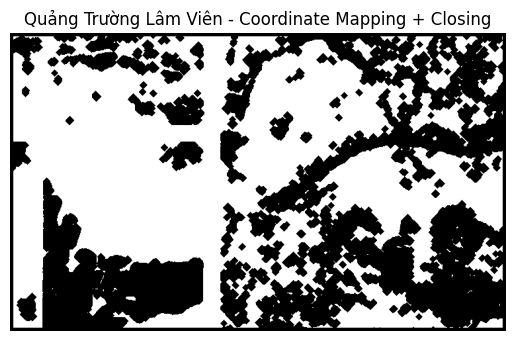

In [27]:
# bài tập 3
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_closing, zoom
import os

# Đường dẫn ảnh
path = 'exercise/dalat.jpg'

# Kiểm tra file tồn tại không
if not os.path.exists(path):
    print("Không tìm thấy ảnh! Kiểm tra tên file hoặc đường dẫn.")
else:
    # Đọc ảnh
    img = cv2.imread(path)

    # Chuyển sang gray
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Chọn vùng Quảng trường Lâm Viên
    y1, y2 = 250, 550
    x1, x2 = 300, 800
    crop = gray[y1:y2, x1:x2]

    # Coordinate Mapping: scale vùng ảnh lên 1.5 lần
    crop_scaled = zoom(crop, zoom=1.5, order=1)

    # Threshold để chuyển thành nhị phân (có thể thay giá trị khác)
    thresh = 128
    binary_crop = (crop_scaled > thresh).astype(np.bool_)

    # Áp dụng Binary Closing
    closed = binary_closing(binary_crop, iterations=5)

    # Chuyển bool sang uint8
    closed_uint8 = closed.astype(np.uint8) * 255

    # Lưu ảnh
    cv2.imwrite('quan_truong_lam_vien.jpg', closed_uint8)

    # Hiển thị kết quả
    plt.imshow(closed_uint8, cmap='gray')
    plt.title('Quảng Trường Lâm Viên - Coordinate Mapping + Closing')
    plt.axis('off')
    plt.show()


== MENU ==
1. geometric_transformation:
   a. coordinate_mapping
   b. Rotate
   c. Shift
2. segment:
   d. Adaptive_thresholding
   e. Binary_dilation
   f. Binary_erosion
   g. Otsu

Nhập lựa chọn (tối đa 2, ví dụ: 'a d' hoặc chỉ 'f'):
==> Áp dụng Coordinate Mapping (scale x1.5)


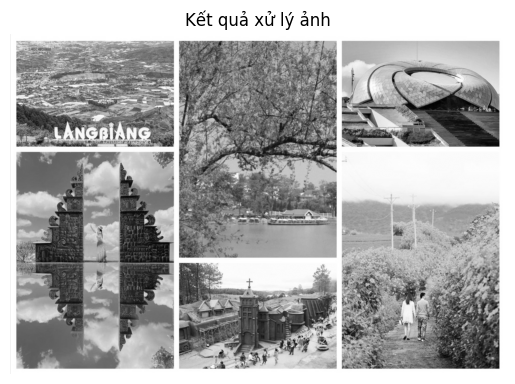

In [1]:
import cv2
import numpy as np
from skimage.filters import threshold_local, threshold_otsu
from scipy.ndimage import rotate, shift, binary_dilation, binary_erosion
import matplotlib.pyplot as plt

# --- Hàm xử lý ảnh ---
def load_image():
    path = 'exercise/dalat.jpg'
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("Không tìm thấy ảnh. Kiểm tra đường dẫn!")
        exit()
    return img

def coordinate_mapping(img):
    print("==> Áp dụng Coordinate Mapping (scale x1.5)")
    from scipy.ndimage import zoom
    return zoom(img, zoom=1.5, order=1)

def rotate_image(img):
    print("==> Xoay ảnh 45 độ")
    return rotate(img, angle=45, reshape=True)

def shift_image(img):
    print("==> Dịch chuyển ảnh 100px sang phải, 50px xuống")
    return shift(img, shift=[50, 100])

def adaptive_thresholding(img):
    print("==> Adaptive Thresholding")
    block_size = 61
    thresh = threshold_local(img, block_size, offset=0)
    return (img > thresh).astype(np.uint8) * 255

def otsu_thresholding(img):
    print("==> Otsu Thresholding")
    thresh = threshold_otsu(img)
    return (img > thresh).astype(np.uint8) * 255

def binary_dilate(img):
    print("==> Binary Dilation")
    bin_img = (img > 128)
    result = binary_dilation(bin_img, iterations=3)
    return result.astype(np.uint8) * 255

def binary_erode(img):
    print("==> Binary Erosion")
    bin_img = (img > 128)
    result = binary_erosion(bin_img, iterations=3)
    return result.astype(np.uint8) * 255

# --- MENU ---
print("== MENU ==")
print("1. geometric_transformation:")
print("   a. coordinate_mapping")
print("   b. Rotate")
print("   c. Shift")
print("2. segment:")
print("   d. Adaptive_thresholding")
print("   e. Binary_dilation")
print("   f. Binary_erosion")
print("   g. Otsu")

# --- Nhập lựa chọn ---
print("\nNhập lựa chọn (tối đa 2, ví dụ: 'a d' hoặc chỉ 'f'):")
choices = input(">>> ").split()

img = load_image()
result = img.copy()

for c in choices:
    if c == 'a':
        result = coordinate_mapping(result)
    elif c == 'b':
        result = rotate_image(result)
    elif c == 'c':
        result = shift_image(result)
    elif c == 'd':
        result = adaptive_thresholding(result)
    elif c == 'e':
        result = binary_dilate(result)
    elif c == 'f':
        result = binary_erode(result)
    elif c == 'g':
        result = otsu_thresholding(result)
    else:
        print(f"Tùy chọn không hợp lệ: {c}")

# --- Hiển thị kết quả ---
plt.imshow(result, cmap='gray')
plt.title("Kết quả xử lý ảnh")
plt.axis('off')
plt.show()
